In [ ]:
import pandas as pd
df = pd.read_csv("/content/nutrients_csvfile.csv")
df.head()
print(df.columns)
print(df['Food'].nunique())
print(df.shape)

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')
329
(335, 10)


In [ ]:
print(df['Category'].value_counts())


Category
Breads, cereals, fastfood,grains    45
Meat, Poultry                       30
Desserts, sweets                    29
Dairy products                      28
Vegetables R-Z                      28
Fruits G-P                          28
Vegetables A-E                      28
Fruits A-F                          22
Fish, Seafood                       19
Fats, Oils, Shortenings             14
Vegetables F-P                      14
Seeds and Nuts                      12
Drinks,Alcohol, Beverages           12
Soups                               10
Fruits R-Z                           8
Jams, Jellies                        8
Name: count, dtype: int64


In [ ]:
#preprocessing
df['Category'] = df['Category'].replace({
    'Fruits A-F': 'Fruits',
    'Fruits G-P': 'Fruits',
    'Fruits R-Z': 'Fruits',
    'Vegetables A-E': 'Vegetables',
    'Vegetables F-P': 'Vegetables',
    'Vegetables R-Z': 'Vegetables'
})
print(df['Category'].value_counts())

Category
Vegetables                          70
Fruits                              58
Breads, cereals, fastfood,grains    45
Meat, Poultry                       30
Desserts, sweets                    29
Dairy products                      28
Fish, Seafood                       19
Fats, Oils, Shortenings             14
Drinks,Alcohol, Beverages           12
Seeds and Nuts                      12
Soups                               10
Jams, Jellies                        8
Name: count, dtype: int64


In [ ]:
#remove non useful columns
# 1. Load and clean data (already done)

# Ensure numeric columns are properly cleaned and converted to numeric types before defining X
# Numeric columns
numeric_cols = ['Calories','Protein','Fat','Sat.Fat','Fiber','Carbs','Grams']

# Clean numeric columns
df[numeric_cols] = (
    df[numeric_cols]
    .replace({',': '', 't': '0'}, regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

# Drop rows with invalid numeric values
df.dropna(subset=numeric_cols, inplace=True)
print(df[numeric_cols].dtypes)

# 3. Train Random Forest ONLY
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object
Random Forest Accuracy: 0.8484848484848485


In [ ]:
print(df[numeric_cols].dtypes)


Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object


In [ ]:
numeric_cols = ['Calories','Protein','Fat','Sat.Fat','Fiber','Carbs','Grams']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object


In [ ]:
numeric_cols = ['Calories','Protein','Fat','Sat.Fat','Fiber','Carbs','Grams']

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)                  # Convert everything to string
        .str.replace(',', '', regex=False)  # Remove commas
        .str.strip()                  # Remove spaces
    )

    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numeric_cols].dtypes)

df.dropna(inplace=True)
print(df[numeric_cols].dtypes)



Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object
Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object


In [ ]:
x = df[numeric_cols]
y = df['Category']

print(x.dtypes)
print(df[numeric_cols].dtypes)



Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object
Calories    float64
Protein       int64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Grams         int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Calories','Protein','Fat','Sat.Fat','Fiber','Carbs','Grams']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#train logistic regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)
y_predict_log=log_model.predict(X_test_scaled)

In [ ]:
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.5606060606060606


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_predict_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.6363636363636364
Random Forest Accuracy: 0.8484848484848485
SVM Accuracy: 0.5606060606060606

Random Forest Classification Report:

                                  precision    recall  f1-score   support

Breads, cereals, fastfood,grains       1.00      0.89      0.94         9
                  Dairy products       0.67      0.67      0.67         6
                Desserts, sweets       0.80      0.67      0.73         6
       Drinks,Alcohol, Beverages       0.67      1.00      0.80         2
         Fats, Oils, Shortenings       0.75      1.00      0.86         3
                   Fish, Seafood       1.00      1.00      1.00         4
                          Fruits       0.83      0.91      0.87        11
                   Jams, Jellies       1.00      1.00      1.00         2
                   Meat, Poultry       1.00      0.83      0.91         6
                  Seeds and Nuts       0.67      1.00      0.80         2
                     

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_predict_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

import pandas as pd

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False)


,Accuracy
Random Forest,0.848485
Logistic Regression,0.636364
SVM,0.560606


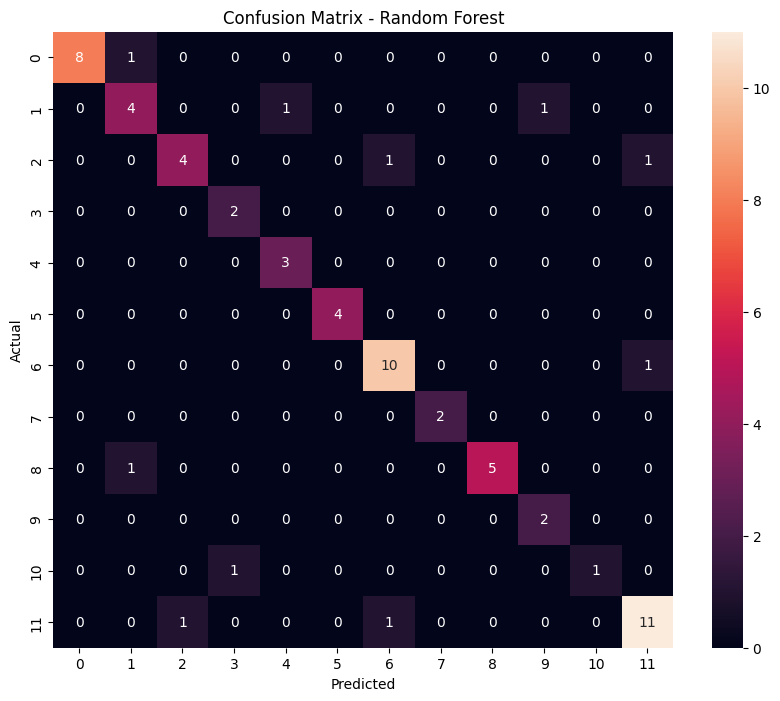

In [ ]:
#if randomforest performs best
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


,0
Grams,0.170498
Carbs,0.169786
Protein,0.168668
Calories,0.159345
Fiber,0.136048
Fat,0.105829
Sat.Fat,0.089825


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,50),
                    max_iter=1000,
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_mlp))


ANN Accuracy: 0.7575757575757576


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.6666666666666666


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.696969696969697


In [ ]:
acc_lr = accuracy_score(y_test, y_predict_log)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
acc_gb = accuracy_score(y_test, y_pred_gb)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = xgb.predict(X_test_xgb)

print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [21:43:50] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6857142857142857


In [ ]:
results = {
    "Random Forest": acc_rf,
    "Gradient Boosting": acc_gb,
    "ANN": acc_mlp,
    "Logistic Regression": acc_lr,
    "KNN": acc_knn,
    "SVM": acc_svm,
    "XGB":acc_xgb}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by="Accuracy", ascending=False)


,Accuracy
Random Forest,0.848485
ANN,0.757576
Gradient Boosting,0.696970
KNN,0.666667
XGB,0.657143
Logistic Regression,0.636364
SVM,0.560606
